## Working with MultiDimensional Image Service with Raster Analytics

Resource: https://developers.arcgis.com/python/
Resource: https://developers.arcgis.com/python/api-reference/arcgis.raster.analytics.html#subset-multidimensional-raster

In [ ]:
pip install arcgis

# Getting your Imagery Layers

Resource: https://developers.arcgis.com/python/guide/using-imagery-layers/

In [61]:
# Load data from REST end point
import arcgis
from arcgis.gis import GIS
from arcgis.raster import *
from datetime import datetime

# Connect to your ArcGIS Enteprise or AGOL
#portal = GIS("https://arcgis-p-8.gisdemo.net/arcgis","")
gis = GIS('https://gis.uat.earthdata.nasa.gov/portal/')
#gis = GIS('home') #AGOL Default, anonymous user
# Check the version of Python API
#arcgis.__version__

service_url = "https://gis.uat.earthdata.nasa.gov/image/rest/services/power/POWER_METEOROLOGY_MONTHLY/ImageServer"
variable = "T2M"
#service_url = "https://gis.uat.earthdata.nasa.gov/image/rest/services/ges-disc/T2M/ImageServer"
imgLyr = ImageryLayer(service_url, gis=gis)
#img_lyr = ImageryLayer("https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/43/M/BP/2021/6/S2A_43MBP_20210622_0_L2A/B08.tif", gis=gis)

#ADD T2M FILTER
imgLyrRaster = Raster(service_url, is_multidimensional=True,  engine=None, gis=gis) #arcgis.raster
#Map Multidimensional Imagery Layer
map = gis.map()
map.time_slider = True
#map.set_time_extent(start_time=d4atetime(1981, 1, 29), end_time=datetime(1981, 12, 31), interval=30.4, unit='days')
map.add_layer(imgLyrRaster)
map

MapView(layout=Layout(height='400px', width='100%'), time_slider=True)

# Using Raster Functions on Imagery Layer

Resource: https://developers.arcgis.com/python/api-reference/arcgis.raster.analytics.html#temporal_profile

In [60]:
# check multiDim info. But you will be able to get dimension/variables from Python API 1.8 version
imgLyr.multidimensional_info

{'multidimensionalInfo': {'variables': [{'name': 'PRECTOTCORR_SUM',
    'unit': 'kg m-2 s-1',
    'statistics': [{'min': 0,
      'max': 0.05413671239512041,
      'mean': 0.0007732035684172213,
      'standardDeviation': 0.0008613081126522749,
      'median': 0.05413671239512041,
      'mode': 0,
      'skipX': 1,
      'skipY': 1,
      'count': 249523200}],
    'histograms': [{'size': 256,
      'min': 0,
      'max': 0.05413671239512041,
      'counts': [55289100,
       11007247,
       11353792,
       9332136,
       15382337,
       4561456,
       3739469,
       2344735,
       2084525,
       2799817,
       970860,
       942657,
       707603,
       1169863,
       445686,
       439482,
       319934,
       321413,
       458239,
       163903,
       183013,
       113379,
       191579,
       78649,
       55928,
       53699,
       38894,
       62663,
       22207,
       21837,
       15092,
       14369,
       19660,
       7127,
       6024,
       5951,
     

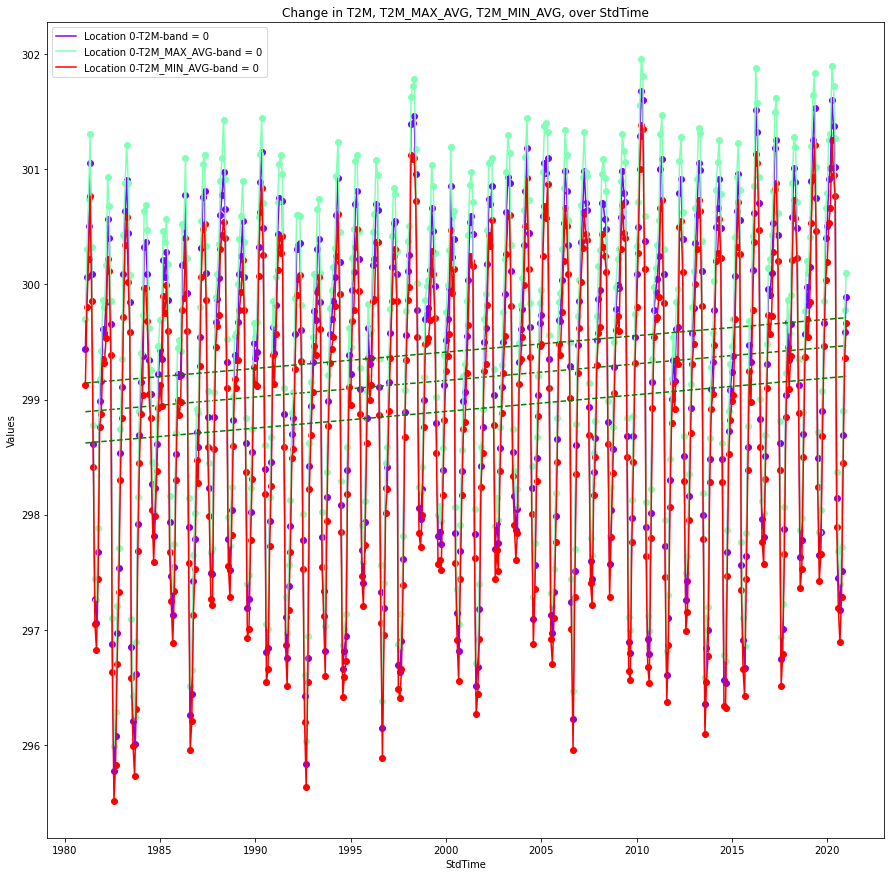

In [57]:
#Generate Temporal Profile graph
from arcgis.geometry import *
Location0 = Point({"x" : 25.773, "y" : -80.216, "spatialReference" : {"wkid" : 3857}})
imgLyr.temporal_profile(points = [Location0], time_field = "StdTime",trend_type ="linear", variables = ["T2M", "T2M_MAX_AVG", "T2M_MIN_AVG"])